In [1]:
import scipy
import math
import pandas as pd
import os
import shlex
from subprocess import check_output

In [2]:
from scipy.spatial import ConvexHull

In [3]:
import numpy as np
import pickle as pkl

import pyvista as pv
from ipywidgets import interact, interactive, fixed, interact_manual

In [4]:
os.chdir(check_output(shlex.split("git rev-parse --show-toplevel")).strip().decode('ascii'))

In [6]:
kk = pkl.load(open("data/transforms/cached/2ch_segmentation__LV__ED__non_scaled__dic.pkl", "rb"))

In [7]:
convhull = []
for i in range(kk["point_clouds"].shape[0]):
  if i % 1000 == 0:
    print(i)
  convhull.append(ConvexHull(kk["point_clouds"][i,:,:] * kk["stddev"] + kk["mean"]))

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000


In [8]:
# pkl.dump(convhull, open("data/transforms/cached/2ch_segmentation__LV__ED__convex_hull.pkl", "wb"))

In [9]:
def plot_mesh(mesh):
  kargs = {"point_size": 5, "render_points_as_spheres": True}
  plotter = pv.Plotter(notebook=True)
  plotter.add_mesh(mesh, **kargs)
  plotter.show(interactive=True)
  plotter.enable()

In [10]:
def sphericity_index(convex_hull):
    return((36* math.pi *convex_hull.volume**2)**(1./3) / convex_hull.area)

In [13]:
sph = [sphericity_index(ch) for ch in convhull]

In [14]:
pd.Series(sph).describe()

count    32647.000000
mean         0.951487
std          0.010449
min          0.894970
25%          0.946136
50%          0.953017
75%          0.958719
max          0.976132
dtype: float64

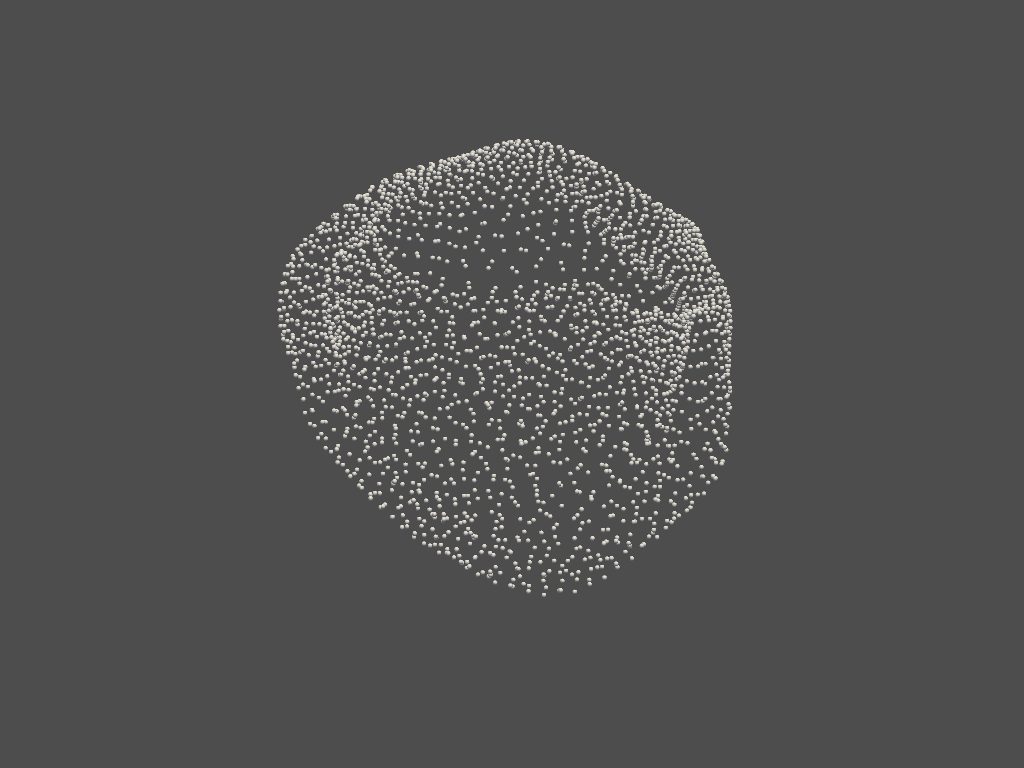

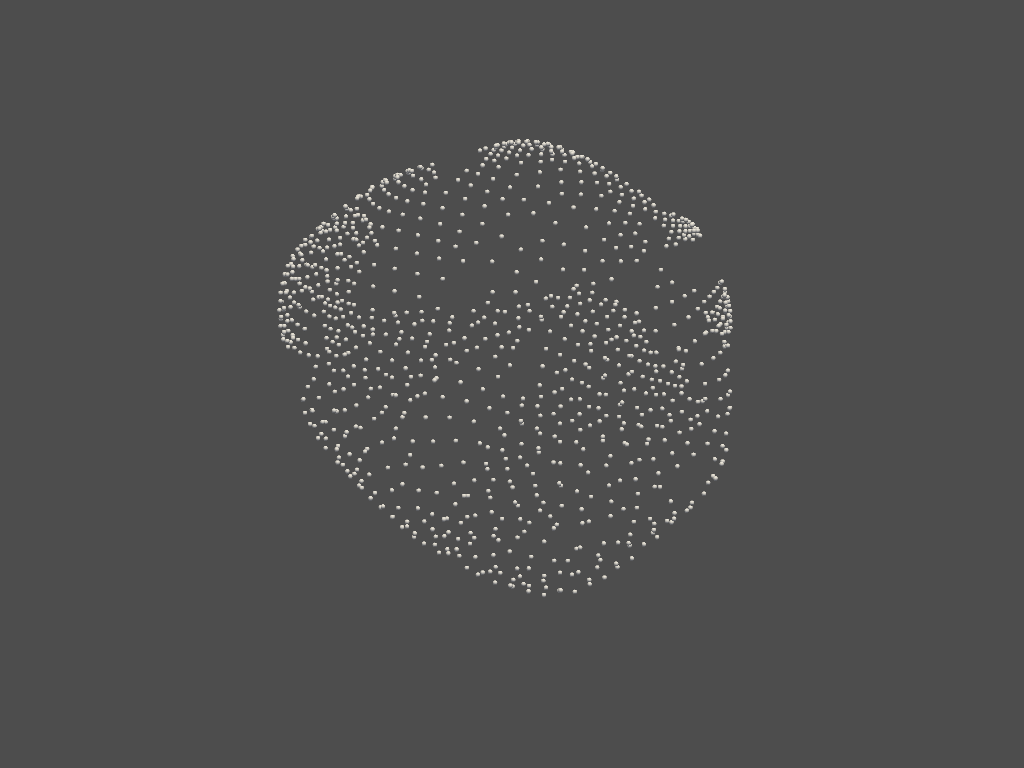

In [15]:
max_ind = sph.index(max(sph))
plot_mesh(convhull[max_ind].points[:,:])
plot_mesh(convhull[max_ind].points[convhull[max_ind].vertices,:])

In [97]:
df = pd.read_csv("/home/rodrigo/data/PhD/UKBB/cardiac_indices/CMR_info_LVRVLARA_11350.csv")

In [114]:
df.index = df.ID
df

,ID,LVEDV,LVESV,LVSV,LVEF,LVM,RVEDV,RVESV,RVSV,RVEF,LAEDV,LAESV,LASV,LAEF,RAEDV,RAESV,RASV,RAEF
ID,,,,,,,,,,,,,,,,,,
1000215,1000215,106,30,76,72,50.0,114,37,77,68,30.0,42.0,12.0,29.0,44.0,53.0,9.0,17.0
1000336,1000336,104,33,71,68,61.0,113,38,75,66,17.0,33.0,16.0,48.0,25.0,66.0,41.0,62.0
1000363,1000363,172,96,76,44,135.0,185,110,75,41,47.0,144.0,97.0,67.0,69.0,163.0,94.0,58.0
1000380,1000380,163,49,114,70,95.0,177,64,113,64,39.0,83.0,44.0,53.0,58.0,94.0,36.0,38.0
1000407,1000407,121,41,80,66,65.0,131,48,83,63,26.0,57.0,31.0,54.0,38.0,64.0,26.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024541,6024541,148,89,59,40,97.0,160,101,59,37,26.0,97.0,71.0,73.0,38.0,120.0,82.0,68.0
6024838,6024838,111,37,74,67,78.0,120,46,74,62,22.0,75.0,53.0,71.0,32.0,84.0,52.0,62.0
6024982,6024982,108,60,48,44,49.0,117,65,52,44,14.0,48.0,34.0,71.0,20.0,55.0,35.0,64.0


In [16]:
sphericity_df = {int(kk["ids"][i]):sph[i] for i, _ in enumerate(sph)}
sphericity_df = pd.DataFrame(pd.Series(sphericity_df))
sphericity_df = sphericity_df.rename(columns={0:"LVSph"})
sphericity_df.to_csv("data/transforms/sphericity.csv")